 ## Exploratory Data Analysis(EDA)

In [ ]:
import pandas as pd

In [5]:
df = pd.read_csv("complete_dataset.csv")

In [6]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [9]:
df.isnull().sum

<bound method DataFrame.sum of        date  demand    RRP  demand_pos_RRP  RRP_positive  demand_neg_RRP  \
0     False   False  False           False         False           False   
1     False   False  False           False         False           False   
2     False   False  False           False         False           False   
3     False   False  False           False         False           False   
4     False   False  False           False         False           False   
...     ...     ...    ...             ...           ...             ...   
2101  False   False  False           False         False           False   
2102  False   False  False           False         False           False   
2103  False   False  False           False         False           False   
2104  False   False  False           False         False           False   
2105  False   False  False           False         False           False   

      RRP_negative  frac_at_neg_RRP  min_temperature  ma

In [10]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


#### The main objective of analyzing electricity demand over time is to understand patterns, trends, and factors influencing demand to make informed decisions in energy management, forecasting, and optimization.

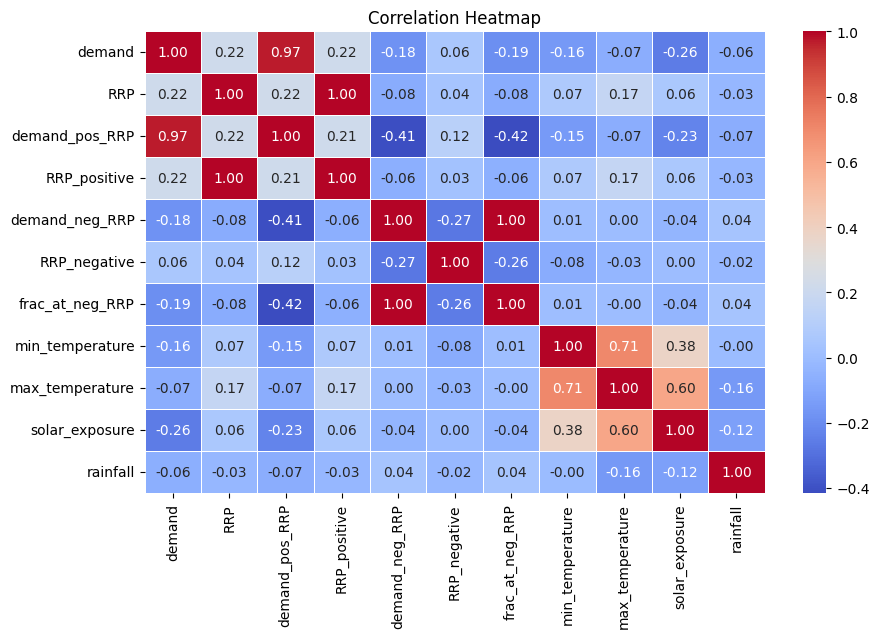

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("complete_dataset.csv")
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


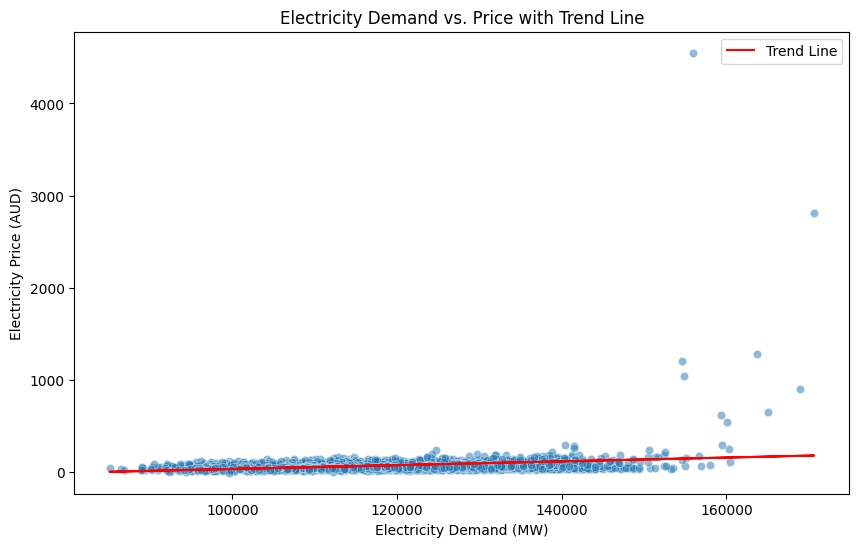

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv("complete_dataset.csv")
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["demand"], y=df["RRP"], alpha=0.5)

X = df["demand"].values.reshape(-1,1)
y = df["RRP"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.plot(df["demand"], y_pred, color='red', label="Trend Line")
plt.xlabel("Electricity Demand (MW)")
plt.ylabel("Electricity Price (AUD)")
plt.title("Electricity Demand vs. Price with Trend Line")
plt.legend()
plt.show()


In [4]:
import pandas as pd
df = pd.read_csv("complete_dataset.csv")
print(df.columns)

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
print(df.head())



        date      demand        RRP  demand_pos_RRP  RRP_positive  \
0 2015-01-01   99635.030  25.633696       97319.240     26.415953   
1 2015-01-02  129606.010  33.138988      121082.015     38.837661   
2 2015-01-03  142300.540  34.564855      142300.540     34.564855   
3 2015-01-04  104330.715  25.005560      104330.715     25.005560   
4 2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8    

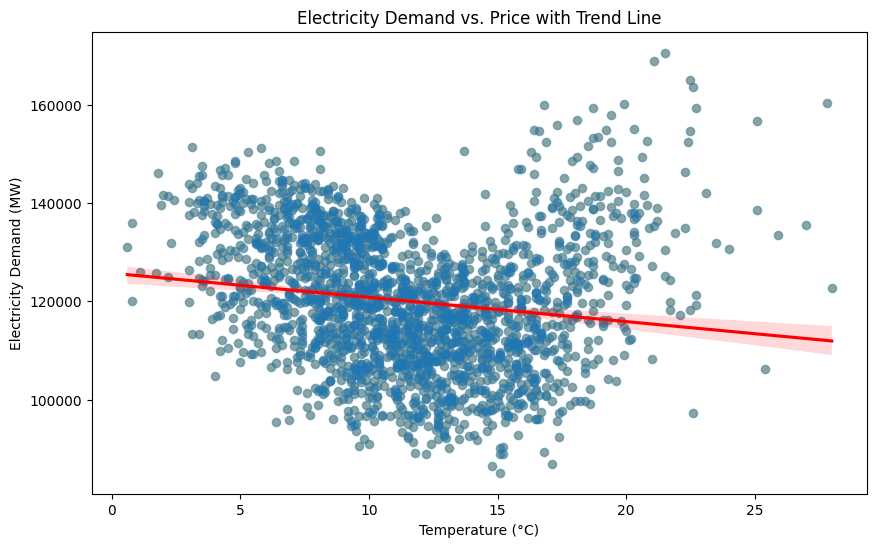

In [112]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["min_temperature"], y=df["demand"], alpha=0.5, color="orange")
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity Demand (MW)")
plt.title("Temperature vs. Electricity Demand")
sns.regplot(x=df["min_temperature"], y=df["demand"], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.xlabel("Temperature (°C)")
plt.ylabel("Electricity Demand (MW)")
plt.title("Electricity Demand vs. Price with Trend Line")
plt.show()

### Load and Prepare the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2102 entries, 2015-01-01 to 2020-10-06
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           2102 non-null   float64
 1   RRP              2102 non-null   float64
 2   demand_pos_RRP   2102 non-null   float64
 3   RRP_positive     2102 non-null   float64
 4   demand_neg_RRP   2102 non-null   float64
 5   RRP_negative     2102 non-null   float64
 6   frac_at_neg_RRP  2102 non-null   float64
 7   min_temperature  2102 non-null   float64
 8   max_temperature  2102 non-null   float64
 9   solar_exposure   2102 non-null   float64
 10  rainfall         2102 non-null   float64
 11  school_day       2102 non-null   object 
 12  holiday          2102 non-null   object 
dtypes: float64(11), object(2)
memory usage: 229.9+ KB
None


#### Daily Electricity Demand

##### The main objective of analyzing electricity demand over time is to understand patterns, trends, and factors influencing demand to make informed decisions in energy management, forecasting, and optimization.

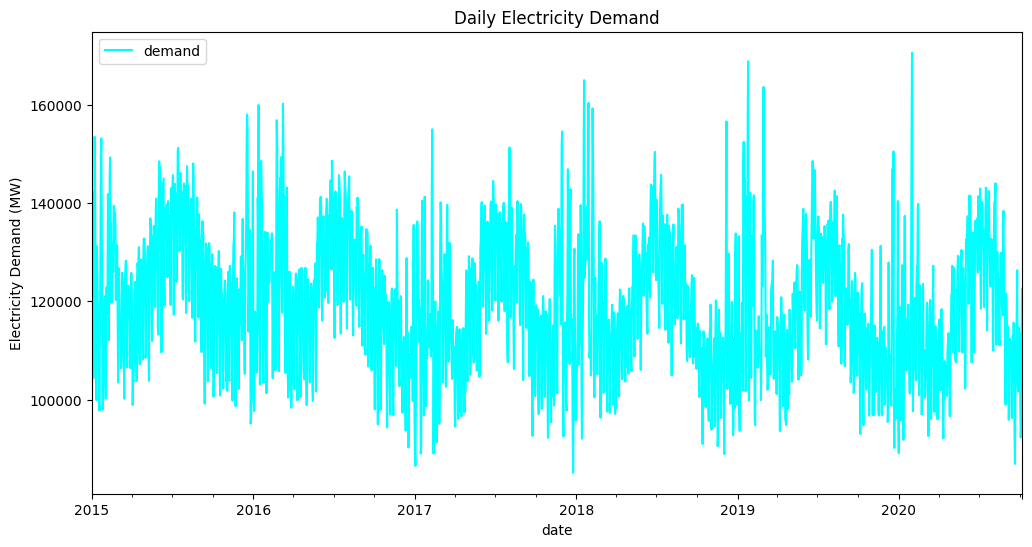

In [14]:
df.resample('D')["demand"].mean().plot(figsize=(12,6), title="Daily Electricity Demand", color="aqua")
plt.xlabel("date")
plt.ylabel("Electricity Demand (MW)")
plt.legend()
plt.show()


#### Weekly Electricity Demand

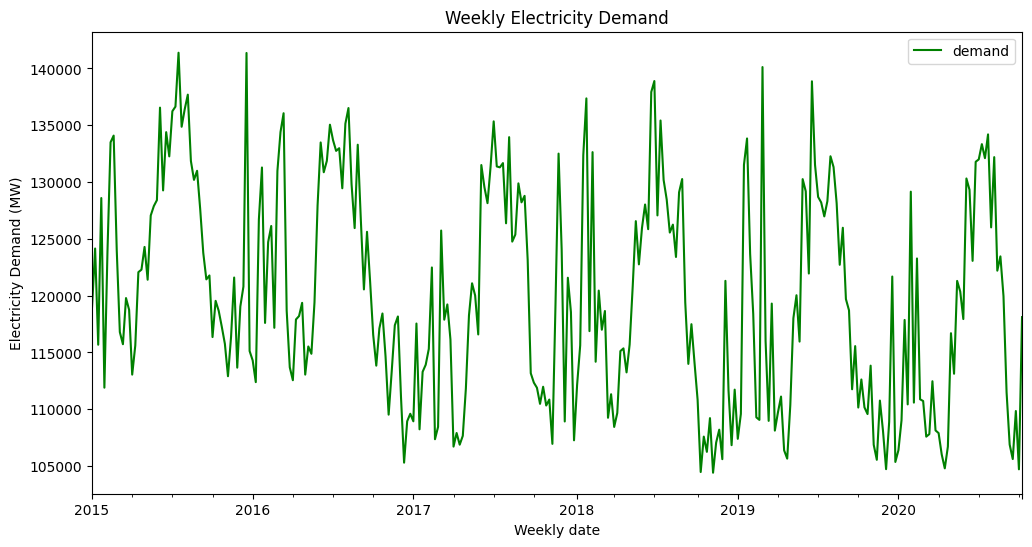

In [13]:
df.resample('W')["demand"].mean().plot(figsize=(12,6), title="Weekly Electricity Demand", color="green")
plt.xlabel("Weekly date")
plt.ylabel("Electricity Demand (MW)")
plt.legend()
plt.show()


#### Monthly Electricity Demand

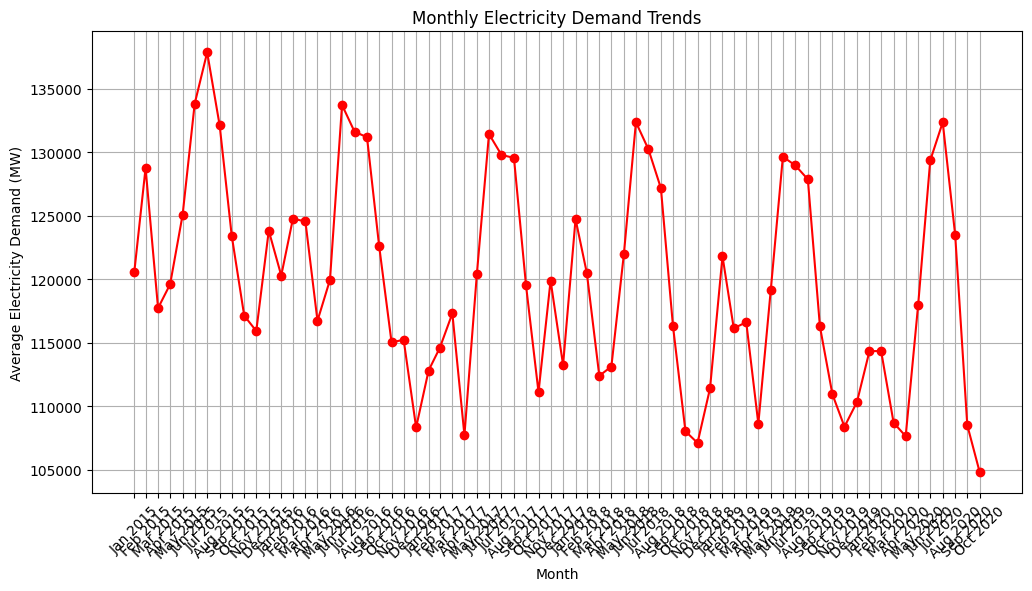

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
monthly_demand = df.resample('ME')["demand"].mean()
plt.figure(figsize=(12,6))
plt.plot(monthly_demand.index, monthly_demand.values, marker="o", linestyle="-", color="red")
plt.xticks(monthly_demand.index, monthly_demand.index.strftime('%b %Y'), rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Electricity Demand (MW)")
plt.title("Monthly Electricity Demand Trends")
plt.grid(True)
plt.show()


### Peak Demand Hours in a Day

This will show peak demand hours, which typically occur in the morning and evening.

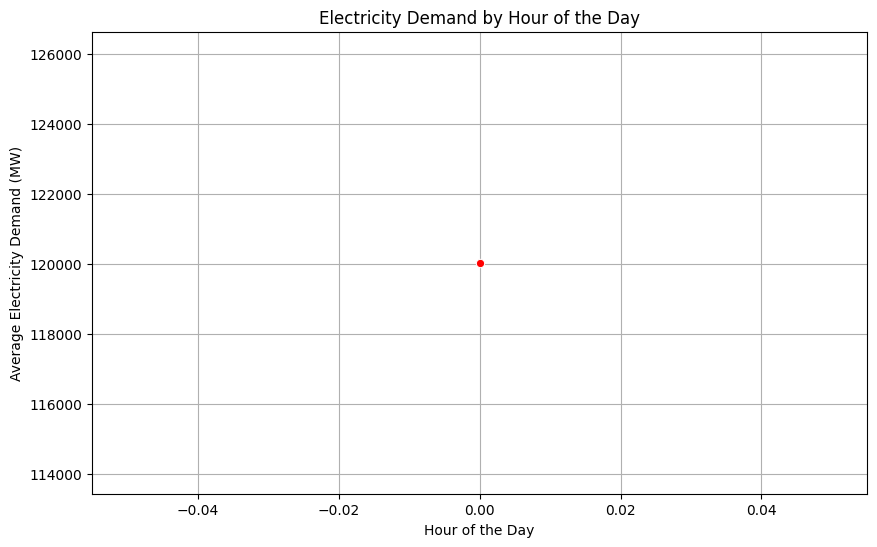

In [22]:
df['Hour'] = df.index.hour
hourly_demand = df.groupby("Hour")["demand"].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values, marker="o", color="Red")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Electricity Demand (MW)")
plt.title("Electricity Demand by Hour of the Day")
plt.grid(True)
plt.show()


### Analyze Demand and Price (RRP) Correlation

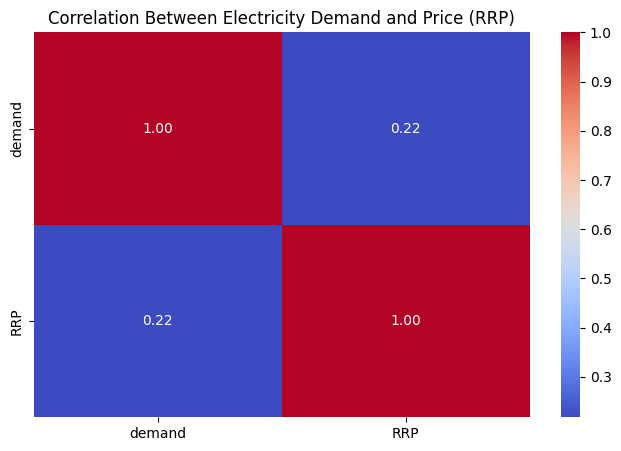

In [25]:
corr_matrix = df[['demand', 'RRP']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Electricity Demand and Price (RRP)")
plt.show()

##### If the correlation is high, then electricity prices tend to increase with demand. If it’s low or negative, price fluctuations may be caused by other factors.

### Visualizing Demand and Price Spikes

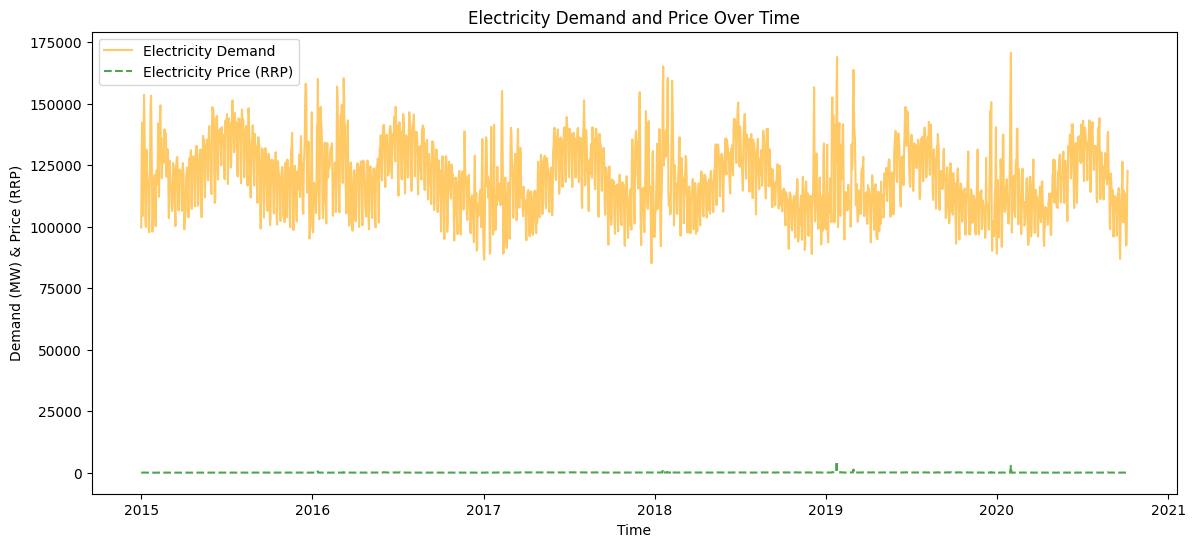

In [29]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["demand"], label="Electricity Demand", color="ORANGE", alpha=0.6)
plt.plot(df.index, df["RRP"], label="Electricity Price (RRP)", color="green", linestyle="dashed", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Demand (MW) & Price (RRP)")
plt.title("Electricity Demand and Price Over Time")
plt.legend()
plt.show()

##### This will highlight periods where both demand and price spike

## Weather Impact Analysis on Electricity Demand

#### Correlation Between Weather and Demand

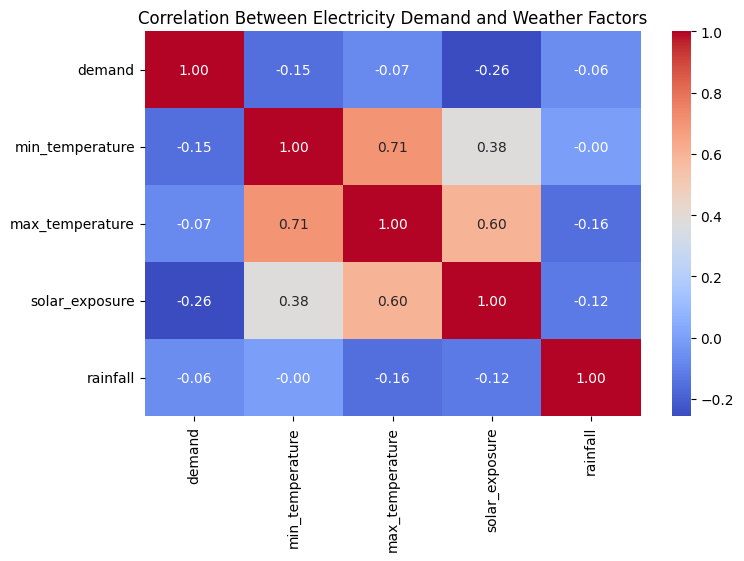

In [33]:
corr_matrix = df[['demand', 'min_temperature','max_temperature','solar_exposure', 'rainfall']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Electricity Demand and Weather Factors")
plt.show()

#### If temperature has a high positive correlation, electricity demand increases in extreme weather (AC/heaters).If solar exposure has a negative correlation, demand may decrease on sunny days (solar energy use).If rainfall has a positive correlation, demand may rise during rainy days due to heating & lighting needs.

## Anomaly Detection & Outlier Analysis in Electricity Demand 

In [65]:
import pandas as pd

df = pd.read_csv("complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df_daily = df.resample('D').mean()
print(df_daily.head())

                demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                              
2015-01-01   99635.030  25.633696       97319.240     26.415953   
2015-01-02  129606.010  33.138988      121082.015     38.837661   
2015-01-03  142300.540  34.564855      142300.540     34.564855   
2015-01-04  104330.715  25.005560      104330.715     25.005560   
2015-01-05  118132.200  26.724176      118132.200     26.724176   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-01-01        2315.790     -7.240000         0.020833             13.3   
2015-01-02        8523.995    -47.809777         0.062500             15.4   
2015-01-03           0.000      0.000000         0.000000             20.0   
2015-01-04           0.000      0.000000         0.000000             16.3   
2015-01-05           0.000      0.000000         0.000000     

In [61]:
Q1 = df_daily["demand"].quantile(0.25)
Q3 = df_daily["demand"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_daily[(df_daily["demand"] < lower_bound) | (df_daily["demand"] > upper_bound)]
print("Detected Outliers:")
print(outliers)


Detected Outliers:
                demand          RRP  demand_pos_RRP  RRP_positive  \
date                                                                
2018-01-19  165070.595   647.574163      165070.595    647.574163   
2019-01-25  168894.845   906.437232      168894.845    906.437232   
2019-03-01  163682.040  1284.799876      163682.040   1284.799876   
2020-01-31  170653.840  2809.437516      170653.840   2809.437516   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2018-01-19             0.0           0.0              0.0             22.5   
2019-01-25             0.0           0.0              0.0             21.1   
2019-03-01             0.0           0.0              0.0             22.6   
2020-01-31             0.0           0.0              0.0             21.5   

            max_temperature  solar_exposure  rainfall  school_day  holiday  \
date               

#### High outliers: Sudden demand spikes due to heatwaves, system failures, or events. Low outliers: Sharp demand drops due to holidays, lockdowns, or technical issues.



### Visualize Outliers

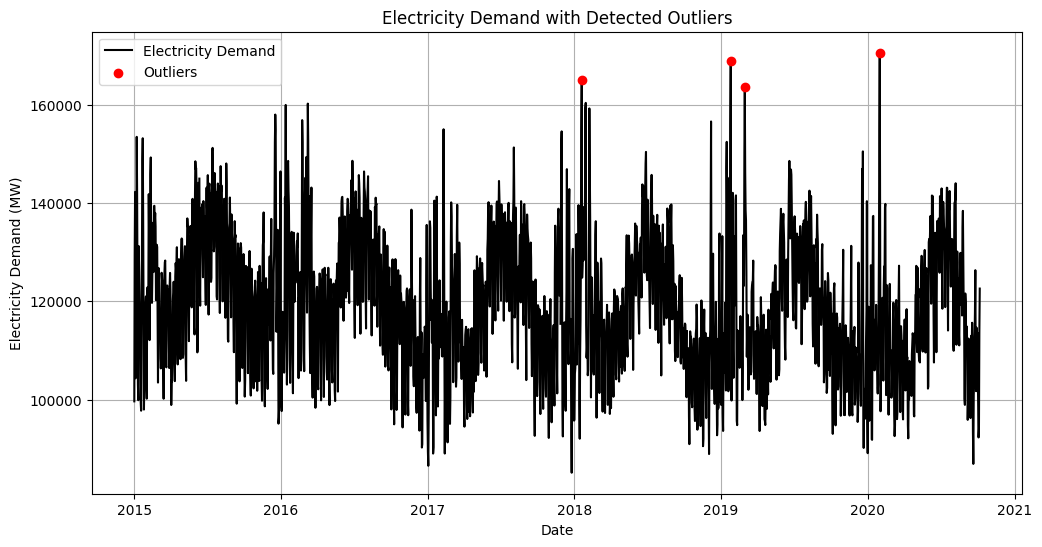

In [64]:
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily["demand"], label="Electricity Demand", color="black")
plt.scatter(outliers.index, outliers["demand"], color="red", label="Outliers", zorder=3)
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MW)")
plt.title("Electricity Demand with Detected Outliers")
plt.legend()
plt.grid(True)
plt.show()


### Causes of Anomalies
     If anomalies match temperature spikes, they are likely due to heatwaves/cold spells.
        If anomalies occur randomly, they may be data errors or grid failures.

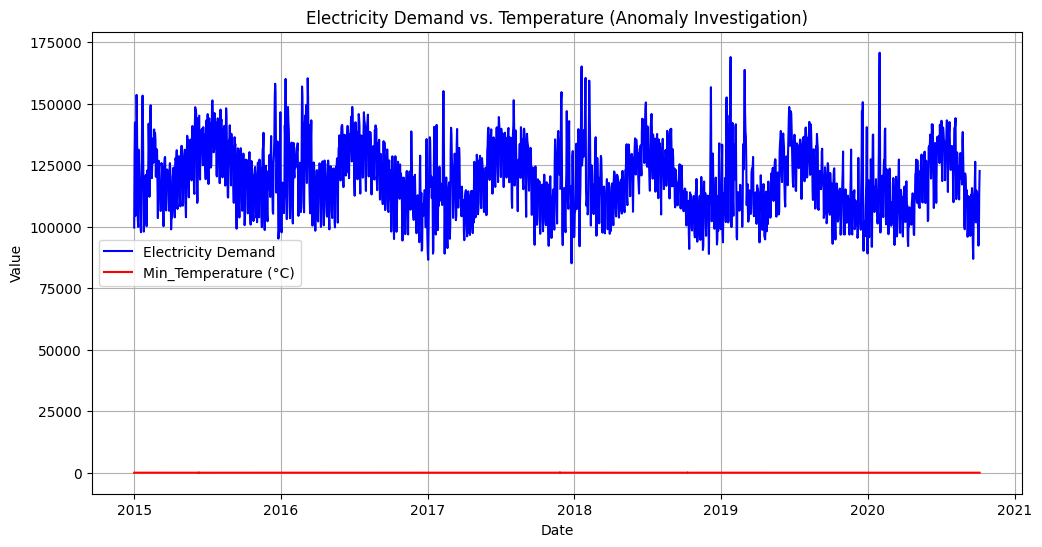

In [70]:
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily["demand"], label="Electricity Demand", color="blue")
plt.plot(df_daily.index, df_daily["min_temperature"], label="Min_Temperature (°C)", color="red")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Electricity Demand vs. Temperature (Anomaly Investigation)")
plt.legend()
plt.grid(True)
plt.show()


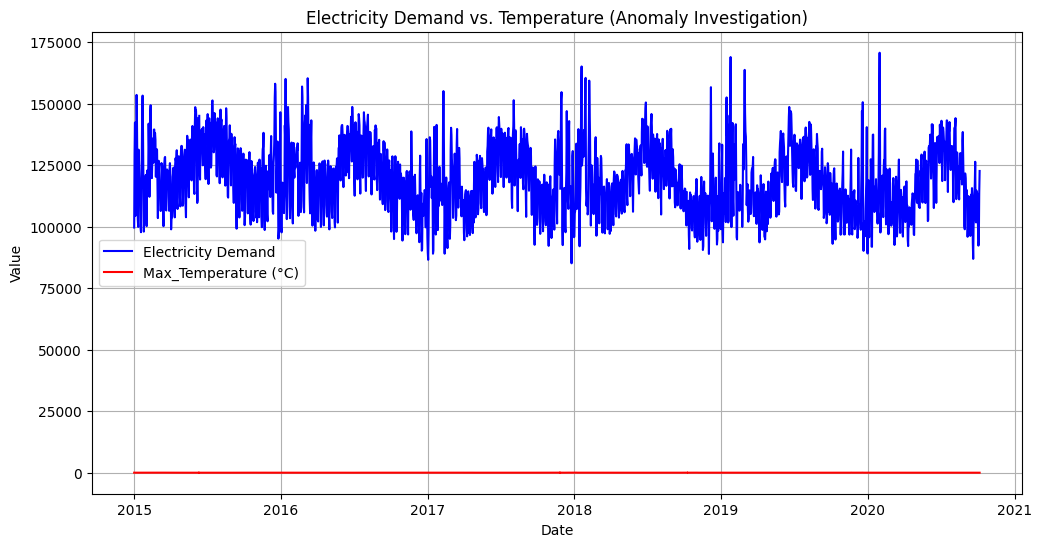

In [77]:
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily["demand"], label="Electricity Demand", color="blue")
plt.plot(df_daily.index, df_daily["max_temperature"], label="Max_Temperature (°C)", color="red")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Electricity Demand vs. Temperature (Anomaly Investigation)")
plt.legend()
plt.grid(True)
plt.show()

In [74]:
df_cleaned = df_daily[(df_daily["demand"] >= lower_bound) & (df_daily["demand"] <= upper_bound)]

In [80]:
df_daily["demand"] = df_daily["demand"].rolling(window=7, center=True).mean()

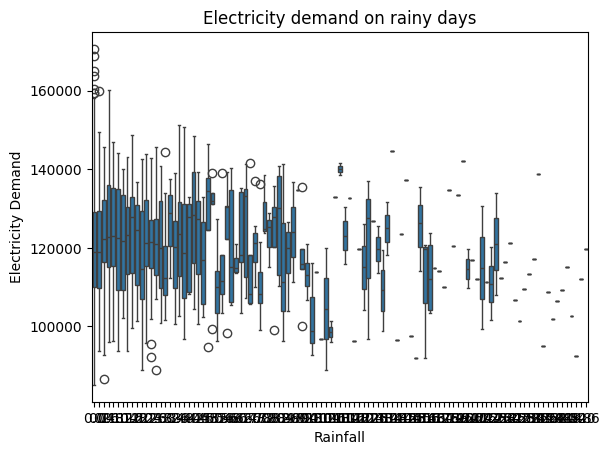

In [87]:
sns.boxplot(x=df['rainfall'], y=df['demand'])
plt.xlabel("Rainfall")
plt.ylabel("Electricity Demand")
plt.title("Electricity demand on rainy days")
plt.show()

### Operational efficiency and Special event analysis

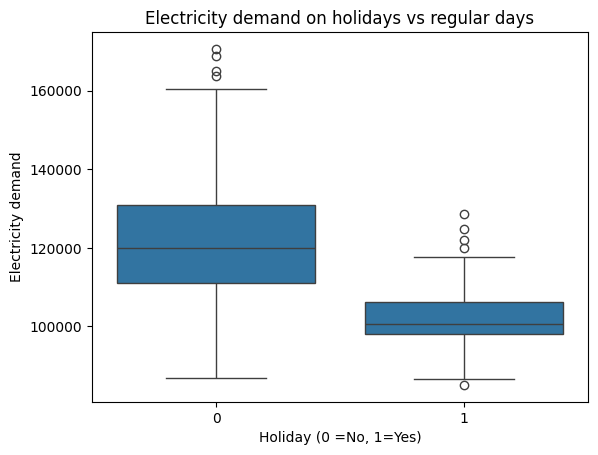

In [93]:
df.replace({'N' : 0,'Y': 1}, inplace=True)
sns.boxplot(x=df['holiday'], y=df['demand'])
plt.xlabel("Holiday (0 =No, 1=Yes)")
plt.ylabel("Electricity demand")
plt.title("Electricity demand on holidays vs regular days")
plt.show()

### Anomaly Detection and Outlier Analysis

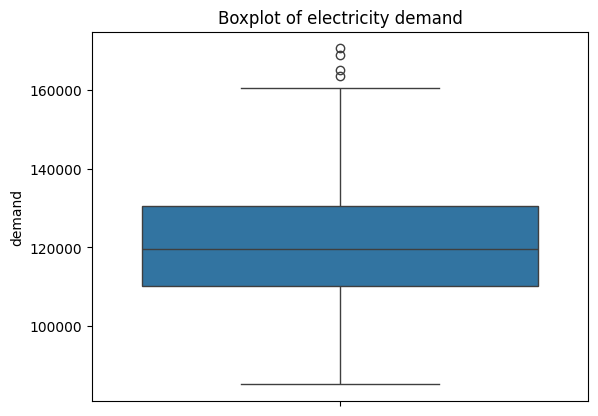

In [94]:
sns.boxplot(y=df["demand"])
plt.title("Boxplot of electricity demand")
plt.show()

### Revenue and cost optimization opportunities

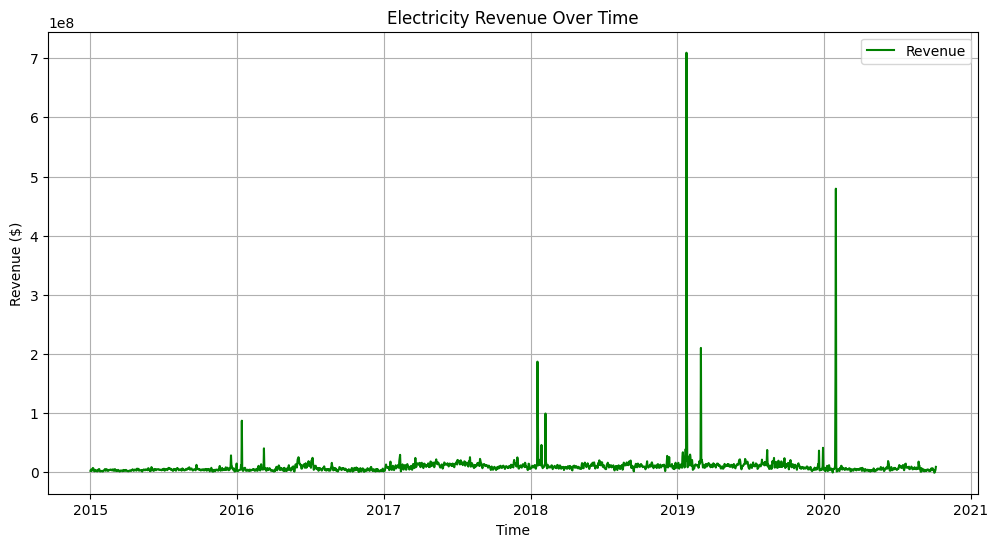

In [107]:
import matplotlib.pyplot as plt

df["Revenue"] = df["demand"] * df["RRP"]  # Calculate revenue

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Revenue"], label="Revenue", color="green")
plt.xlabel("Time")
plt.ylabel("Revenue ($)")
plt.title("Electricity Revenue Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Optimize Procurement Strategy
Shift demand to low-cost periods (e.g., schedule industrial usage at night).Use renewable energy storage to avoid buying expensive peak-hour electricity.

In [110]:
df["Procurement_Cost"] = df["demand"] * df["RRP"]
peak_cost_hours = df[df["RRP"] > df["RRP"].quantile(0.75)]
print("High-cost periods:\n", peak_cost_hours[["RRP", "demand", "Procurement_Cost"]].head())

High-cost periods:
                    RRP      demand  Procurement_Cost
date                                                
2015-09-22   99.476167  127755.095      1.270859e+07
2015-12-17  188.086125  152366.300      2.865799e+07
2015-12-31  101.991559  146473.835      1.493909e+07
2016-01-13  545.737820  160011.075      8.732410e+07
2016-03-01   96.287619  142242.595      1.369620e+07


## Profit Calulation

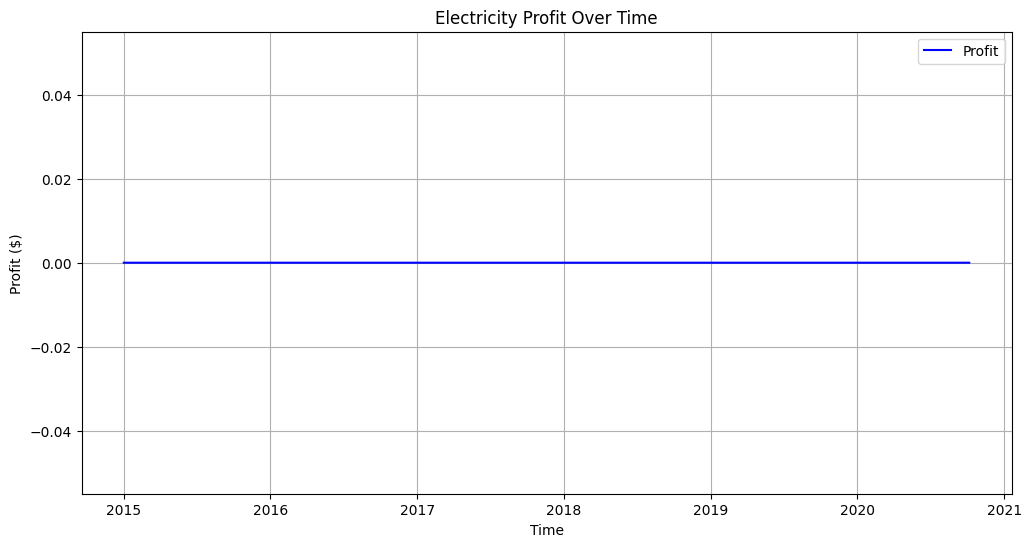

In [111]:
df["Profit"] = df["Revenue"] - df["Procurement_Cost"]
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Profit"], label="Profit", color="blue")
plt.xlabel("Time")
plt.ylabel("Profit ($)")
plt.title("Electricity Profit Over Time")
plt.legend()
plt.grid(True)
plt.show()